## A Simple Twitter Sentiment Analysis using Tweepy and AYLIEN

#### Analysis of ~100 most recent tweets containing "#Tether"
##### Results: > 95% of recent tweets mentioning #Tether are neutral in sentiment
     
#### Further research: Increase sample size to greater than 1000 tweets to gain further insight, analyze other cryptocurrencies via Twitter's API or scraping Reddit

In [33]:
import sys
import csv, io
import tweepy, codecs
import matplotlib.pyplot as plt

from collections import Counter
from aylienapiclient import textapi

if sys.version_info[0] < 3:
   input = raw_input

## Twitter credentials
consumer_key = "EZ4XzAwE72eerVuLBHLbkMzdR"
consumer_secret = "0DKq1A0rr41l7nHy1leMZClFziisTcHSFrGMp49MStcsEvX6I8"
access_token = "535899104-bsdzeP3r4xwClK0PmpMWoa8PCARDh1TlmkrFZAtX"
access_token_secret = "CjcQqXezExYkFVDLar8Xfq7NvKirDqGtZmgN0CnjRKtUv"

## AYLIEN credentials
application_id = "2380fbd6"
application_key = "e5ae67f0ba2e06f4e5ee580b0f856046"

In [34]:
## set up an instance of Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [39]:
## set up an instance of the AYLIEN Text API
client = textapi.Client(application_id, application_key)

## search Twitter for something that interests you
results = api.search(q = "#Tether", lang = "en", result_type = "recent", count = 100)

print("--- Gathered Tweets \n")

--- Gathered Tweets 



In [40]:
# use the codecs library to write the text of the Tweets to a .txt file
file = codecs.open("tweets.txt", "w", "utf-8")
for result in results:
    file.write(result.text)
    file.write("\n")
file.close()

In [41]:
with io.open('Tether_Tweets.csv', 'w', encoding='utf8', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Tweet", "Sentiment"])
    with io.open("tweets.txt", 'r', encoding='utf8') as f:
        for tweet in f.readlines():
        	## Remove extra spaces or newlines around the text
        	tweet = tweet.strip()

        	## Reject tweets which are empty so you don’t waste your API credits
        	if len(tweet) == 0:
        		print('skipped')
        		continue
        	
        	print(tweet)

        	## Make call to AYLIEN Text API
        	sentiment = client.Sentiment({'text': tweet})

        	## Write the sentiment result into csv file
        	csv_writer.writerow([sentiment['text'], sentiment['polarity']])

How much damage does #tether $usdt and coins alike do to the #cryptocurrency economy as a whole?
I bet #tether is selling a whole lotta coins right now #Hodl #altcoins #BTFD #crypto #Cryptocurreny
RT @mindandtrading: $NEO $usdt (#Bittrex ) Bullish Gartley Pattern in Daily Chart Targets $82-$105-$170, Stop Loss $44. #NEO #Tether https:…
RT @LeahWald1: Extremely well-done video about #tether by @Truth_Investor! Published back in Jan. &amp; especially prescient right now."If it l…
RT @Bl0ckchain: Trade $usdt by @Tether_to on #BarterDEX atomic swap exchange developed by @KomodoPlatform✨
skipped
https://t.co/6KMwIjD8be👈
https:…
RT @Bl0ckchain: Trade $usdt by @Tether_to on #BarterDEX atomic swap exchange developed by @KomodoPlatform✨
skipped
https://t.co/6KMwIjD8be👈
https:…
Best #cryptocurrency risk-adjusted returns in the past week:
1. #TRON $TRX
2. #Tether $USDT
3. #Lisk $LSK https://t.co/3FMM6jybK8
Stablecoins Explained #stablecoins #crypto #tether #dao #maker #dai https://t.co/WfzIHZurfR

HttpError: <HttpError 429 when requesting https://api.aylien.com/api/v1/sentiment returned "Too Many Requests">

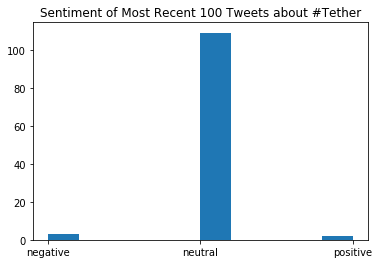

In [53]:
## import the libraries
import matplotlib.pyplot as plt 
import pandas as pd
from collections import Counter
import csv 

## open up your csv file with the sentiment results
with open('Tether_Tweets.csv', 'r', encoding = 'utf8') as csvfile:
    ## use Pandas to read the “Sentiment” column,
        df = pd.read_csv(csvfile)
        sent = df["Sentiment"]

## use Counter to count how many times each sentiment appears
## and save each as a variable
counter = Counter(sent)
positive = counter['positive']
negative = counter['negative']
neutral = counter['neutral']

## declare the variables for the pie chart, using the Counter variables for “sizes”
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
colors = ['green', 'red', 'grey']
yourtext = "#Tether"

## use matplotlib to plot the chart
plt.hist(x=sent)
#plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Sentiment of Most Recent 100 Tweets about "+yourtext)
plt.show()